In [ ]:
# Mohmmed AL-zhrani 

In [ ]:
# 2041606

In [ ]:
# Importing the libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Import panda package and load the dataset
import pandas as pd
df = pd.read_csv("MobilePriceDataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Changing pandas dataframe to numpy array
X_data = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Split the dataset into train (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X_data,y,test_size=0.2)

In [ ]:
len(X_train)

1600

In [ ]:
len(X_test)

400

In [ ]:
X_train[0].shape

(20,)

In [ ]:
X_train[0]

array([1.002e+03, 0.000e+00, 2.700e+00, 1.000e+00, 1.600e+01, 1.000e+00,
       1.100e+01, 4.000e-01, 1.850e+02, 6.000e+00, 1.800e+01, 2.850e+02,
       5.120e+02, 9.610e+02, 1.000e+01, 7.000e+00, 1.900e+01, 1.000e+00,
       0.000e+00, 1.000e+00])

Text(0.5, 1.0, 'Correlation')

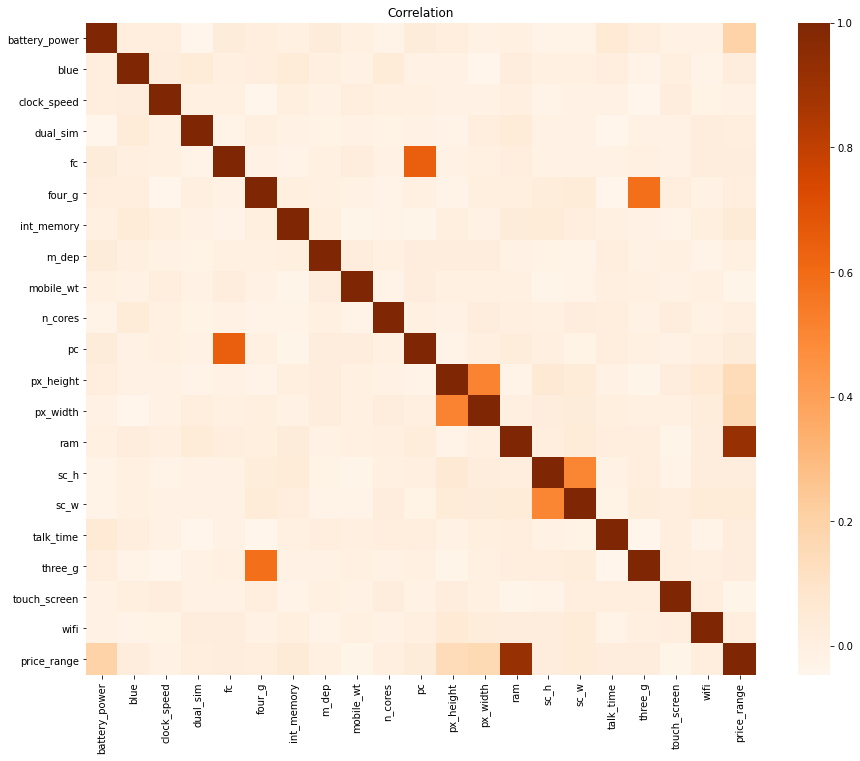

In [ ]:
#correlation value between features
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Oranges')
r.set_title("Correlation")

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train[0]

array([-0.5415582 , -0.98757716,  1.46556903,  0.97652545,  2.68104426,
        0.95596841, -1.14045501, -0.3647914 ,  1.25290454,  0.64757384,
        1.31951275, -0.82556611, -1.71134256, -1.08270926, -0.54237153,
        0.27864931,  1.44931526,  0.55328334, -1.03563452,  0.98634324])

In [ ]:
# Defining the model and adding the layers
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_shape=(20,), activation='sigmoid'))
model.add(keras.layers.Dense(12, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=111)

Epoch 1/111
50/50 [==============================] - 1s 2ms/step - loss: 1.3961 - accuracy: 0.2781
Epoch 2/111
50/50 [==============================] - 0s 2ms/step - loss: 1.3635 - accuracy: 0.3544
Epoch 3/111
50/50 [==============================] - 0s 2ms/step - loss: 1.3431 - accuracy: 0.4250
Epoch 4/111
50/50 [==============================] - 0s 2ms/step - loss: 1.3161 - accuracy: 0.4794
Epoch 5/111
50/50 [==============================] - 0s 2ms/step - loss: 1.2828 - accuracy: 0.5288
Epoch 6/111
50/50 [==============================] - 0s 2ms/step - loss: 1.2404 - accuracy: 0.5831
Epoch 7/111
50/50 [==============================] - 0s 2ms/step - loss: 1.1873 - accuracy: 0.6175
Epoch 8/111
50/50 [==============================] - 0s 2ms/step - loss: 1.1263 - accuracy: 0.6406
Epoch 9/111
50/50 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.7156
Epoch 10/111
50/50 [==============================] - 0s 2ms/step - loss: 0.9883 - accuracy: 0.7406
Epoch 11/

In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9350


[0.13142748177051544, 0.9350000023841858]